In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10

In [8]:
# Load Fashion-MNIST dataset
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()
x_train_fashion = x_train_fashion.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test_fashion = x_test_fashion.reshape(-1, 28, 28, 1).astype('float32') / 255

# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
x_train_cifar = x_train_cifar.astype('float32') / 255
x_test_cifar = x_test_cifar.astype('float32') / 255



In [36]:
# Define the class names
class_names_fashion = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names_cifar =   ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [22]:
# Create a custom model for Fashion-MNIST
def create_fashion_mnist_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [23]:
# Fit the data augmentation to the training data
datagen.fit(x_train_fashion)

In [24]:
# Create a custom model for CIFAR-10
def create_cifar10_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [25]:
datagen.fit(x_train_cifar)

In [26]:
# Create the models
fashion_mnist_model = create_fashion_mnist_model()
cifar10_model = create_cifar10_model()


In [13]:
# Train the models
fashion_mnist_model.fit(x_train_fashion, y_train_fashion, epochs=10)
cifar10_model.fit(x_train_cifar, y_train_cifar, epochs=10)


Epoch 1/10


1875/1875 [==============================] - 72s 33ms/step - loss: 0.4040 - accuracy: 0.8542
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2650 - accuracy: 0.9031
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2189 - accuracy: 0.9193
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1845 - accuracy: 0.9313
Epoch 5/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1560 - accuracy: 0.9415
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1317 - accuracy: 0.9506
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1094 - accuracy: 0.9588
Epoch 8/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0930 - accuracy: 0.9642
Epoch 9/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0782 - accuracy: 0.9697
Epoch 10/10
1875/1875 [==============================] - 75s 4

In [31]:
# Train the model
history = cifar10_model.fit(x_train_cifar, y_train_cifar, epochs=10, validation_data=(x_test_cifar, y_test_cifar))

# Print the training and validation accuracy and loss
print("Training Accuracy:", history.history['accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

Epoch 1/10
1563/1563 [==============================] - 249s 150ms/step - loss: 1.3713 - accuracy: 0.5074 - val_loss: 1.0829 - val_accuracy: 0.6206
Epoch 2/10
1563/1563 [==============================] - 134s 86ms/step - loss: 1.0058 - accuracy: 0.6465 - val_loss: 0.9616 - val_accuracy: 0.6651
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.8631 - accuracy: 0.6963 - val_loss: 0.9253 - val_accuracy: 0.6781
Epoch 4/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.7652 - accuracy: 0.7305 - val_loss: 0.8926 - val_accuracy: 0.6984
Epoch 5/10
1563/1563 [==============================] - 217s 139ms/step - loss: 0.6770 - accuracy: 0.7622 - val_loss: 0.9096 - val_accuracy: 0.6979
Epoch 6/10
1563/1563 [==============================] - 208s 133ms/step - loss: 0.5973 - accuracy: 0.7893 - val_loss: 0.9005 - val_accuracy: 0.7011
Epoch 7/10
1563/1563 [==============================] - 219s 140ms/step - loss: 0.5234 - accuracy: 0.8158 - val_lo

In [27]:
# Train the model
history = fashion_mnist_model.fit(x_train_fashion, y_train_fashion, epochs=10, validation_data=(x_test_fashion, y_test_fashion))

# Print the training and validation accuracy and loss
print("Training Accuracy:", history.history['accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

Epoch 1/10
1875/1875 [==============================] - 87s 44ms/step - loss: 0.4003 - accuracy: 0.8546 - val_loss: 0.3097 - val_accuracy: 0.8868
Epoch 2/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.2622 - accuracy: 0.9038 - val_loss: 0.2685 - val_accuracy: 0.9030
Epoch 3/10
1875/1875 [==============================] - 115s 62ms/step - loss: 0.2178 - accuracy: 0.9197 - val_loss: 0.2466 - val_accuracy: 0.9107
Epoch 4/10
1875/1875 [==============================] - 149s 79ms/step - loss: 0.1854 - accuracy: 0.9315 - val_loss: 0.2407 - val_accuracy: 0.9126
Epoch 5/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.1595 - accuracy: 0.9415 - val_loss: 0.2365 - val_accuracy: 0.9166
Epoch 6/10
1875/1875 [==============================] - 163s 87ms/step - loss: 0.1336 - accuracy: 0.9496 - val_loss: 0.2593 - val_accuracy: 0.9109
Epoch 7/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.1137 - accuracy: 0.9573 - val_loss: 0.2

In [120]:
# Assuming fashion_mnist_model is your trained model
fashion_mnist_model.save('fashion_mnist_model.keras')
cifar10_model.save('cifar10_model.keras')

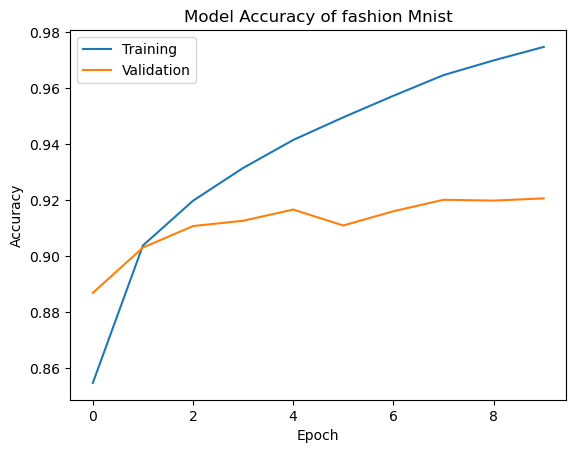

In [28]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy of fashion Mnist')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

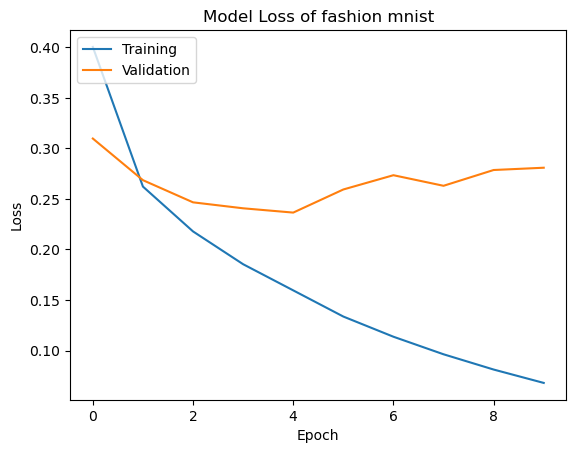

In [29]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss of fashion mnist')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [30]:
# Evaluate the model
loss, accuracy = fashion_mnist_model.evaluate(x_test_fashion, y_test_fashion, verbose=2)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 - 10s - loss: 0.2808 - accuracy: 0.9206 - 10s/epoch - 31ms/step
Test Loss: 0.2808
Test Accuracy: 0.9206


In [32]:
# Evaluate the model
loss, accuracy = cifar10_model.evaluate(x_test_cifar, y_test_cifar, verbose=2)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 - 31s - loss: 1.1491 - accuracy: 0.6873 - 31s/epoch - 101ms/step
Test Loss: 1.1491
Test Accuracy: 0.6873


In [35]:
import numpy as np
# Define the function to filter out non-relevant images
def filter_non_relevant_images(images, fashion_mnist_model):
    # Initialize an empty list to store the filtered images
    filtered_images = []

    # Loop through each image in the dataset
    for image in images:
        # Reshape the image to the input shape of the model
        image = image.reshape(1, 28, 28, 1)

        # Predict the class probability distribution for the image
        probabilities = fashion_mnist_model.predict(image)

        # If the maximum class probability is below a threshold, add the image to the filtered list
        if np.max(probabilities) < 0.9:
            filtered_images.append(image[0])

    # Convert the filtered list to a numpy array
    filtered_images = np.array(filtered_images)

    return filtered_images

# Filter out non-relevant images
x_test_filtered_fashion = filter_non_relevant_images(x_test_fashion, fashion_mnist_model)

# Evaluate the model on the filtered test dataset
loss, accuracy = fashion_mnist_model.evaluate(x_test_filtered_fashion, y_test_fashion, verbose=2)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1/1 [==============================] - 0s 48ms/step


ValueError: Data cardinality is ambiguous:
  x sizes: 1180
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [68]:
# Compile the model
fashion_mnist_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [96]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import load_model

# Load the saved model
fashion_mnist_model = load_model('fashion_mnist_model.h5')

# Define the relevant classes
relevant_classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [109]:
 def filter_non_relevant_images(x, y, model, relevant_classes):
    # Predict the classes for the input images
    y_pred = model.predict(x)
    y_pred_indices = np.argmax(y_pred, axis=1)

    # Find indices of relevant classes
    relevant_indices = [i for i, class_name in enumerate(class_names_fashion) if class_name in relevant_classes]
    
    # Filter out non-relevant images
    relevant_mask = np.isin(y_pred_indices, relevant_indices)
    
    # Return the relevant images and their corresponding labels
    return x[relevant_mask], y[relevant_mask]


In [110]:
# Preprocess the images
x_test_fashion = x_test_fashion.reshape(-1, 28, 28, 1).astype('float32') / 255


In [111]:
# Make predictions on the test set
y_pred_fashion = fashion_mnist_model.predict(x_test_fashion)

313/313 [==============================] - 11s 34ms/step


In [112]:
# Convert the predictions to class names
class_names_fashion = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
y_pred_classes_fashion = [class_names_fashion[np.argmax(prediction)] for prediction in y_pred_fashion]


In [113]:
# Convert the list of class names to a NumPy array of class indices
y_pred_indices_fashion = np.array([relevant_classes.index(class_name) for class_name in y_pred_classes_fashion])

In [114]:
# Filter out non-relevant images
x_relevant_fashion, y_relevant_fashion = filter_non_relevant_images(x_test_fashion, y_pred_indices_fashion, fashion_mnist_model, relevant_classes)

313/313 [==============================] - 12s 37ms/step


In [115]:
# Print the number of relevant images
print('Number of relevant images:', len(x_relevant_fashion))

Number of relevant images: 10000


In [122]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

# Load the saved model
cifar10_model = load_model('cifar10_model.keras')

# Define the list of relevant classes
relevant_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [123]:

# Define the function to filter out non-relevant images
def filter_non_relevant_images(x, y, cifar10_model, relevant_classes):
    relevant_mask = np.zeros(y.shape, dtype=bool)
    for i, class_name in enumerate(relevant_classes):
        relevant_mask |= (y == class_name)
    x_relevant = x[relevant_mask]
    y_relevant = y[relevant_mask]
    return x_relevant, y_relevant


In [125]:
# Load the CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# Preprocess the images
x_train_cifar = x_train_cifar.astype('float32') / 255
x_test_cifar = x_test_cifar.astype('float32') / 255


In [129]:
# Make predictions on the test set
y_pred_cifar = cifar10_model.predict(x_test_cifar)
y_pred_classes_cifar = [class_names_cifar[np.argmax(prediction)] for prediction in y_pred_cifar]

# Convert the predictions to class indices
y_pred_indices_cifar = np.array([relevant_classes.index(class_name) for class_name in y_pred_classes_cifar])

# Filter out non-relevant images
x_relevant, y_relevant = filter_non_relevant_images(x_test_cifar, y_pred_indices_cifar, cifar10_model, relevant_classes)

# Print the number of relevant images
print('Number of relevant images:', len(x_relevant))

313/313 [==============================] - 5s 14ms/step
Number of relevant images: 0
